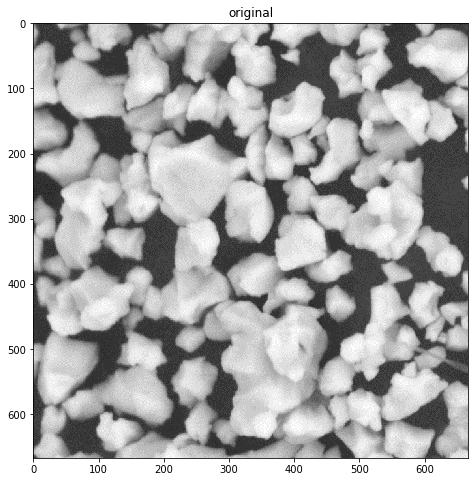

In [23]:
import Dataset
from Utils import visualize

original = Dataset.large_4x()
visualize(original, 'original')

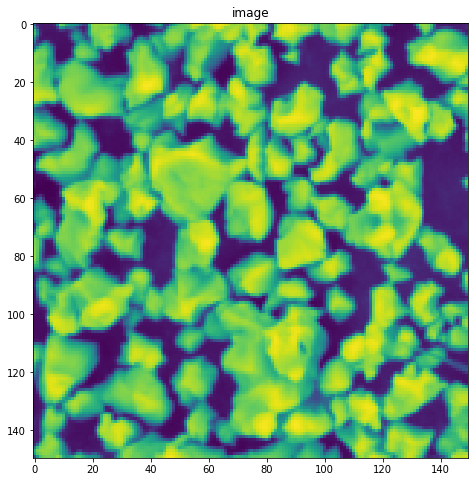

In [24]:
from Utils import image_to_grayscale
from skimage import transform
import numpy as np


image = image_to_grayscale(original)
image = transform.resize(image, (np.array(image.shape) / np.max(image.shape) * 150).astype(int))
# image_square = transform.resize(image, np.full_like(image.shape, np.max(image.shape)), mode='symmetric', preserve_range=True)

visualize(image, 'image')
# visualize(image_square, 'image_square')

# add noise
# image = image.astype(float)
# image += 1 + 10 * np.random.randn(*image.shape)
# visualize(image, 'image')


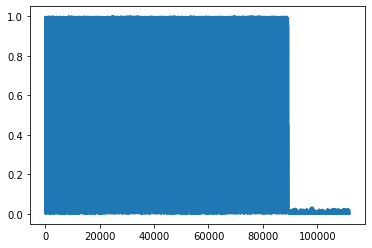

In [25]:
from sklearn.feature_extraction import img_to_graph
import matplotlib.pyplot as plot

graph = img_to_graph(image / 255)
graph.data = np.exp(- 5 * graph.data / graph.data.std())

plot.plot([i for i in range(len(graph.data))], graph.data)
# visualize(graph, 'graph')

In [26]:
from sklearn.cluster import spectral_clustering


labels = spectral_clustering(
    graph, 
    n_clusters=30, 
    eigen_solver='amg',
    assign_labels='kmeans', 
    random_state=1,
)
labels = labels.reshape(image.shape)


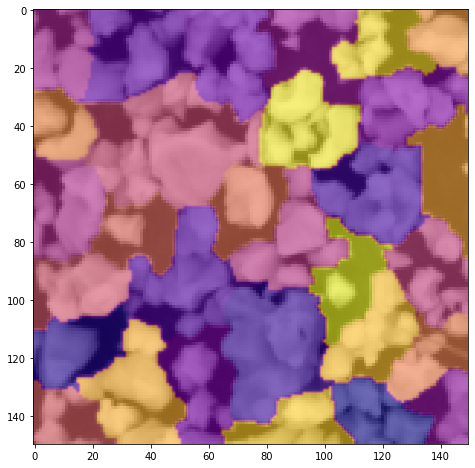

In [34]:
plot.figure(figsize=(8, 8))
plot.imshow(image, cmap='gray')
plot.imshow(labels, cmap='plasma', alpha=.6, interpolation='bilinear')
plot.show()

